# Haberman's Survival Data Set

**Overview:**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Source:** https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [1]:
import pandas as pd

In [2]:
hmn = pd.read_csv('haberman.csv')

In [3]:
#(Q) how many observations and features are there in the total dataset?
print (hmn.shape)

(305, 4)


but, the kaggle website says there are 306 instances of data. read point 5 at https://www.kaggle.com/gilsousa/habermans-survival-data-set/data

also opening the original haberman.csv file in a text-editor like notepad++ shows 306 rows.

so where is the missing row? lets find out

In [4]:
#view some data from the hmn dataframe
hmn.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


seems like pandas is using up the first data row as the column header. Lets fix that;

In [5]:
#read haberman.csv data-set again and add column headers
hmn = pd.read_csv('haberman.csv' , names = ["age", "op-yr", "node", "class"])

print (hmn.shape)

(306, 4)


In [6]:
# view some random data to confirm everything is as expected
hmn.sample(5)

,age,op-yr,node,class
280,68,68,0,1
18,37,60,0,1
210,58,61,1,1
89,46,58,2,2
129,50,63,1,1


In [7]:
#(Q) what are the columns in our dataset?
print (hmn.columns)

Index(['age', 'op-yr', 'node', 'class'], dtype='object')


Column Information:
   * age: Age of patient at time of operation (numerical)
   * op-yr: Patient's calender year of operation (19xx, numerical)
   * node: Number of positive axillary nodes detected (numerical)
       * A positive axillary node is a lymph node in the area of the armpit (axilla) to which cancer has spread. See- https://en.wikipedia.org/wiki/Positive_axillary_lymph_node
   * class: Survival status (numerical)
       * 1 = the patient survived 5 years or longer after the operation
       * 2 = the patient died within 5 year of operation

**OBJECTIVE:**

Given a new patient's (age, year-of-operation, count-of-positive-nodes-detected) we want to build a model which predicts if the patient will survive for more than 5 years after the operation or not.

The following is the Exploratory Data Analysis for the same.

In [8]:
#(Q) how many data points for each class are present?
hmn["class"].value_counts()

1    225
2     81
Name: class, dtype: int64

###### Conclusions:
1. This is an imbalanced dataset.
    * ~**73.5%** survied for more than 5 yr after the operation
    * ~**26.5%** did not

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [10]:
#separating class1 and class2 dataset for better understanding and ease of working

hmn_1 = hmn.loc[hmn['class']==1]
hmn_2 = hmn.loc[hmn['class']==2]

First I'll try performing univariate analysis and see if the features individually reflect anything

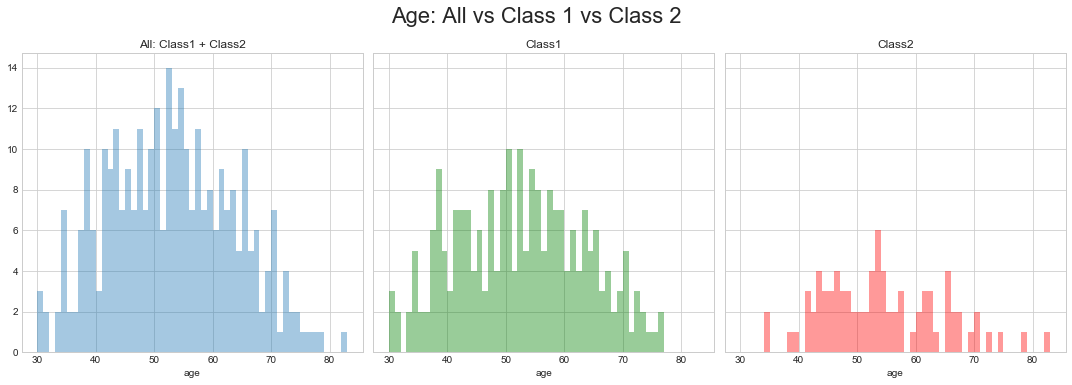

In [11]:
# 1. Studying 'age' feature

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)

plt.suptitle("Age: All vs Class 1 vs Class 2", y=1.06, fontsize=22)
fig.set_figheight(5)
fig.set_figwidth(15)

axs[0].set_title('All: Class1 + Class2')
sns.distplot(hmn['age'], 
             bins=range(min(hmn['age']), max(hmn['age']) + 1), 
             kde=False, ax=axs[0])

axs[1].set_title('Class1')
sns.distplot(hmn_1['age'], 
             bins=range(min(hmn_1['age']), max(hmn_1['age']) + 1), 
             color='g', kde=False, ax=axs[1])

axs[2].set_title('Class2')
sns.distplot(hmn_2['age'], 
             bins=range(min(hmn_2['age']), max(hmn_2['age']) + 1), 
             color='r', kde=False, ax=axs[2])

plt.tight_layout()
plt.show()

In [12]:
hmn['age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

In [13]:
hmn_1['age'].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [14]:
hmn_2['age'].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

In [15]:
print("Total: Number of Patient whose age <40 = {}"
      .format(len(hmn[hmn['age']<=40])))
print("Class 1: Number of Patient whose age <40 = {}"
      .format(len(hmn_1[hmn_1['age']<=40])))

Total: Number of Patient whose age <40 = 43
Class 1: Number of Patient whose age <40 = 39


###### Conclusions:
1. **All** patients **< 34** years of age at the time of operation survived for more than 5 years

2. **No** patient **> 77** years of age at the time of operation survived for more than 5 years

3. If patient's age is **<= 40** at the time of operation, chances of survival for more than 5 years is significantly higher at **90%**(39/43) 

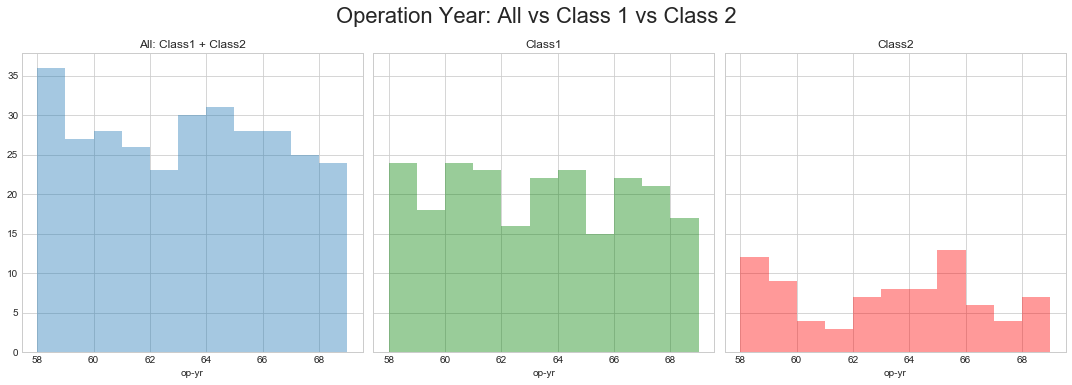

In [16]:
# 2. Studying 'op-yr' feature

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)

plt.suptitle("Operation Year: All vs Class 1 vs Class 2", y=1.06, fontsize=22)
fig.set_figheight(5)
fig.set_figwidth(15)

axs[0].set_title('All: Class1 + Class2')
sns.distplot(hmn['op-yr'], 
             bins=range(min(hmn['op-yr']), max(hmn['op-yr']) + 1), 
             kde=False, ax=axs[0])

axs[1].set_title('Class1')
sns.distplot(hmn_1['op-yr'], 
             bins=range(min(hmn_1['op-yr']), max(hmn_1['op-yr']) + 1), 
             color='g', kde=False, ax=axs[1])

axs[2].set_title('Class2')
sns.distplot(hmn_2['op-yr'], 
             bins=range(min(hmn_2['op-yr']), max(hmn_2['op-yr']) + 1), 
             color='r', kde=False, ax=axs[2])

plt.tight_layout()
plt.show()

In [17]:
hmn['op-yr'].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: op-yr, dtype: float64

In [18]:
hmn_1['op-yr'].describe()

count    225.000000
mean      62.862222
std        3.222915
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: op-yr, dtype: float64

In [19]:
hmn_2['op-yr'].describe()

count    81.000000
mean     62.827160
std       3.342118
min      58.000000
25%      59.000000
50%      63.000000
75%      65.000000
max      69.000000
Name: op-yr, dtype: float64

In [20]:
# % patient distribution of class1 vs class2 for each year

for i in range(min(hmn['op-yr']), max(hmn['op-yr']) + 1):
    total = len(hmn[hmn['op-yr']==i])
    class1 = len(hmn_1[hmn_1['op-yr']==i])
    print("year: 19{}, total-patient: {}, class1: {}%, class2: {}%"
          .format(i,total,round(class1/total*100,2),round(100-(class1/total*100),2)))

year: 1958, total-patient: 36, class1: 66.67%, class2: 33.33%
year: 1959, total-patient: 27, class1: 66.67%, class2: 33.33%
year: 1960, total-patient: 28, class1: 85.71%, class2: 14.29%
year: 1961, total-patient: 26, class1: 88.46%, class2: 11.54%
year: 1962, total-patient: 23, class1: 69.57%, class2: 30.43%
year: 1963, total-patient: 30, class1: 73.33%, class2: 26.67%
year: 1964, total-patient: 31, class1: 74.19%, class2: 25.81%
year: 1965, total-patient: 28, class1: 53.57%, class2: 46.43%
year: 1966, total-patient: 28, class1: 78.57%, class2: 21.43%
year: 1967, total-patient: 25, class1: 84.0%, class2: 16.0%
year: 1968, total-patient: 13, class1: 76.92%, class2: 23.08%
year: 1969, total-patient: 11, class1: 63.64%, class2: 36.36%


###### Conclusions:
1. Year of Operation doesn't seem to have any prominent effect on patient's survival status.

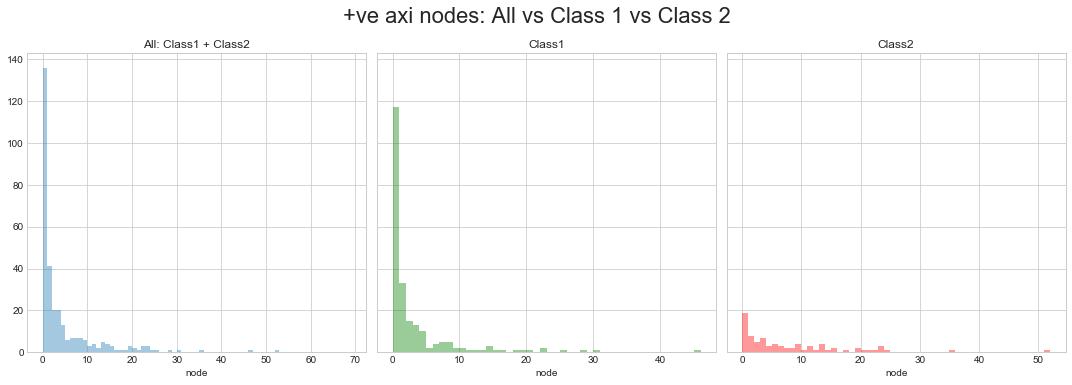

In [21]:
# 3. Studying 'node' feature

fig, axs = plt.subplots(1, 3, sharey=True)

plt.suptitle("+ve axi nodes: All vs Class 1 vs Class 2", y=1.06, fontsize=22)
fig.set_figheight(5)
fig.set_figwidth(15)

axs[0].set_title('All: Class1 + Class2')
sns.distplot(hmn['node'], 
             bins=range(min(hmn['node']), max(hmn['op-yr']) + 1), 
             kde=False, ax=axs[0])

axs[1].set_title('Class1')
sns.distplot(hmn_1['node'], 
             bins=range(min(hmn_1['node']), max(hmn_1['node']) + 1), 
             color='g', kde=False, ax=axs[1])

axs[2].set_title('Class2')
sns.distplot(hmn_2['node'], 
             bins=range(min(hmn_2['node']), max(hmn_2['node']) + 1), 
             color='r', kde=False, ax=axs[2])

plt.tight_layout()
plt.show()

In [22]:
hmn['node'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: node, dtype: float64

In [23]:
hmn_1['node'].describe()

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: node, dtype: float64

In [24]:
hmn_2['node'].describe()

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: node, dtype: float64

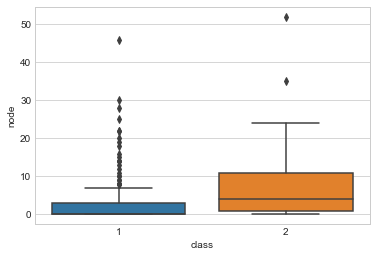

In [25]:
sns.boxplot(x='class',y='node', data=hmn)
plt.show()

In [26]:
print("Total: Number of Patient with detected +ve node =0: {}"
      .format(len(hmn[hmn['node']==0])))
print("Total: Number of Patient with detected +ve node <10: {}"
      .format(len(hmn[hmn['node']<10])))

Total: Number of Patient with detected +ve node =0: 136
Total: Number of Patient with detected +ve node <10: 263


###### Conclusions:
1. **44%** of patients are detected with 0 +ve axillary nodes
2. Though the maximum number of nodes detected for any patient is 52, **86%** of patients are detected with < 10 +ve axillary nodes
3. **75%** of patients who survived for more than 5 years after the operation had +ve axillary node <=3
4. **50%** of patients who did not survive for more than 5 years after the operation had +ve axillary node >4

Next I'll try bivariate analysis(age vs node-count) and check if they together reflect something more.

We already know that 75% patient who survive have +ve axillary node <=3

But what about those who do not survive in spite of <=3 +ve nodes detected. Do age play a factor there?

In [27]:
#(Q) For class-2 patients with <=3 nodes, what were their age?

hmn_2[hmn_2['node']<=3]['age'].describe()

count    39.000000
mean     54.256410
std      11.818179
min      34.000000
25%      45.000000
50%      52.000000
75%      62.500000
max      83.000000
Name: age, dtype: float64

###### Conclusions:
1. **75%** of patients who could not survive more than 5 yr had age **>45** at the time of operation

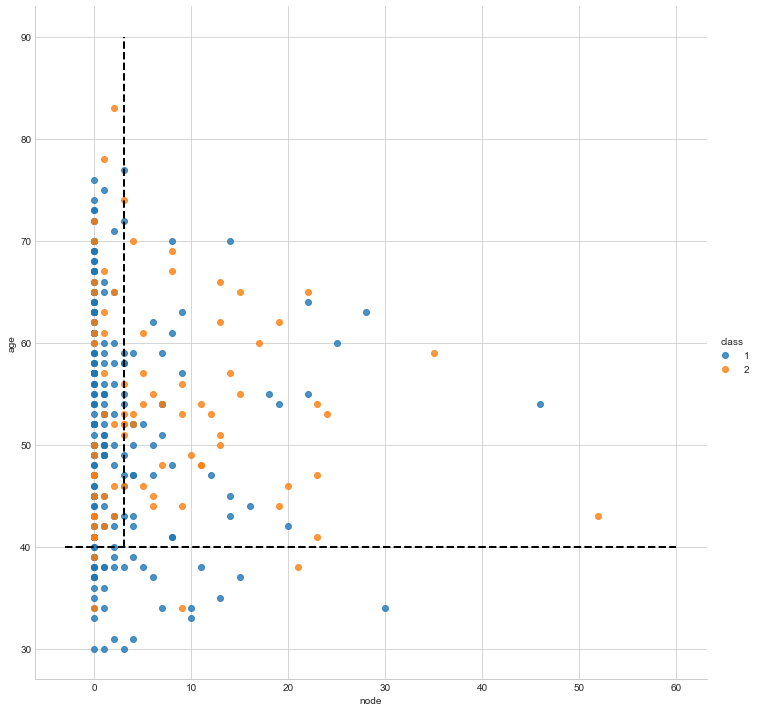

In [28]:
sns.lmplot("node", "age", data=hmn, hue='class', fit_reg=False, size=10)

plt.plot([-3, 60], [40, 40], 'k--', linewidth=2)
plt.plot([3, 3], [40, 90], 'k--', linewidth=2)

plt.show()

In [29]:
print("Total: Number of Patient whose age >40 and node <=3 = {}"
      .format(len(hmn[(hmn['age']>40)&(hmn['node']<=3)])))
print("Class1: Number of Patient whose age >40 and node <=3 = {}"
      .format(len(hmn_1[(hmn_1['age']>40)&(hmn_1['node']<=3)])))
print()
print("Total: Number of Patient whose age >40 and node >3 = {}"
      .format(len(hmn[(hmn['age']>40)&(hmn['node']>3)])))
print("Class1: Number of Patient whose age >40 and node >3 = {}"
      .format(len(hmn_1[(hmn_1['age']>40)&(hmn_1['node']>3)])))

Total: Number of Patient whose age >40 and node <=3 = 187
Class1: Number of Patient whose age >40 and node <=3 = 150

Total: Number of Patient whose age >40 and node >3 = 76
Class1: Number of Patient whose age >40 and node >3 = 36


###### Conclusions:
* I divided the above scatterplot into 3 regions
* Calaulated % patient distribution of class-1 vs class-2 for each region.
 
| Region |       Condition     | class-1 % | class-2 % |
|--------|---------------------|-----------|-----------|
|    1   |       age <= 40     |     90    |     10    |
|    2   | age > 40 & node <=3 |     80    |     20    |
|    3   | age > 40 & node >3  |     47    |     53    |

* Build a pseudo model,

 which Given a new patient's (age, year-of-operation, count-of-positive-nodes-detected), predicts if the patient will survive for more than 5 years after the operation or not.

In [30]:
# Pseudo Model :

def predict(age, opyr, node):
    
    '''This function returns
        True: if a patient will survive for more than 5 years
        False: otherwise
    '''
    
    if age<=40:
        return True  # 90% success rate
    else:
        if node<=3:
            return True  # 80% success rate
        else:
            return
            # I need some help here
            # and would love to know how you would have analyzed this 